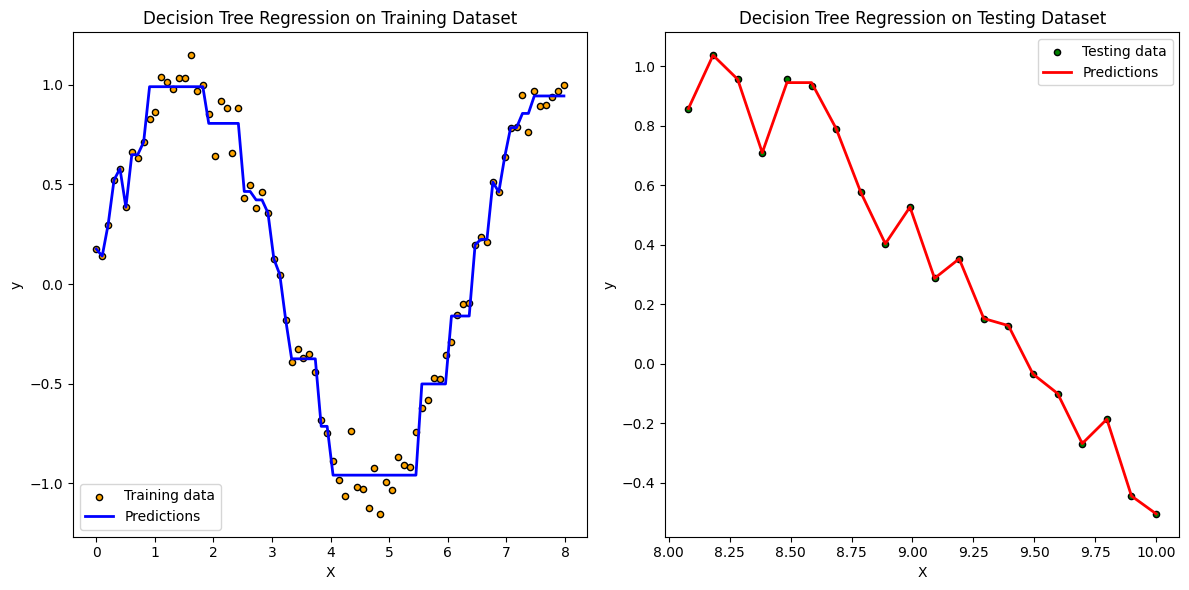

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        node = {}

        if depth < self.max_depth or self.max_depth is None:
            feature_index, threshold = self._best_split(X, y)
            if feature_index is not None:
                left_indices, right_indices = self._split(X[:, feature_index], threshold)
                node['feature_index'] = feature_index
                node['threshold'] = threshold
                node['left'] = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
                node['right'] = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
            else:
                node['value'] = np.mean(y)  # Leaf node, assign the average of target values
        else:
            node['value'] = np.mean(y)  # Leaf node, assign the average of target values

        return node

    def _best_split(self, X, y):
        best_feature_index = None
        best_threshold = None
        best_variance_reduction = -np.inf

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices, right_indices = self._split(X[:, feature_index], threshold)
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                variance_reduction = self._variance_reduction(y, y[left_indices], y[right_indices])
                if variance_reduction > best_variance_reduction:
                    best_feature_index = feature_index
                    best_threshold = threshold
                    best_variance_reduction = variance_reduction

        return best_feature_index, best_threshold

    def _variance_reduction(self, parent, left_child, right_child):
        var_total = np.var(parent)
        var_left = np.var(left_child)
        var_right = np.var(right_child)
        n_total = len(parent)
        n_left = len(left_child)
        n_right = len(right_child)
        return var_total - (n_left / n_total * var_left + n_right / n_total * var_right)

    def _split(self, X_column, threshold):
        left_indices = np.where(X_column <= threshold)[0]
        right_indices = np.where(X_column > threshold)[0]
        return left_indices, right_indices

    def _predict_tree(self, x, tree):
        if 'value' in tree:
            return tree['value']
        else:
            if x[tree['feature_index']] <= tree['threshold']:
                return self._predict_tree(x, tree['left'])
            else:
                return self._predict_tree(x, tree['right'])

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_tree(x, self.tree))
        return np.array(predictions)

# Generate synthetic dataset
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])  # Sinusoidal relationship with some noise

# Split data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Instantiate and fit the model for training data
model_train = DecisionTreeRegressor(max_depth=5)
model_train.fit(X_train, y_train)

# Make predictions for training data
predictions_train = model_train.predict(X_train)

# Instantiate and fit the model for testing data
model_test = DecisionTreeRegressor(max_depth=5)
model_test.fit(X_test, y_test)

# Make predictions for testing data
predictions_test = model_test.predict(X_test)

# Plot the results for both training and testing data
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(X_train.ravel(), y_train, s=20, edgecolor="black", c="orange", label="Training data")
plt.plot(X_train.ravel(), predictions_train, color="blue", label="Predictions", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression on Training Dataset")
plt.legend()

# Plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test.ravel(), y_test, s=20, edgecolor="black", c="green", label="Testing data")
plt.plot(X_test.ravel(), predictions_test, color="red", label="Predictions", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression on Testing Dataset")
plt.legend()

plt.tight_layout()
plt.show()
